# COGS 108 - Final Project 

# Overview

Parks and public recreational services are important aspects of our life. Good parks enhance life quality and community awareness. And park amenities can range widely from playgrounds, dog parks, to elder services. When considering all the features a park can include, playgrounds are the most common. While using a playground can increase social contact and social behaviors, we also want to know whether is a critical aspect to increasing the feeling of happiness during people's visit. On the other hand, there might also be people that are not in particular favor of playgrounds. This data science project intends to analyze the sentiment difference between reviews on parks with playgrounds and without. And through the sentiment analysis, we can conclude that there is a slight difference within the sentiment between the reviews of parks with and without a playground. The sentiment for the reviews for parks with a playground is slightly more positive. 

# Name & GitHub

- Name: Huiyan(Morgan) Li
- GitHub Username: HuiyanL116

# Research Question

Do people generally have a better time and leave more positive ratings in a park that has a playground?

## Background and Prior Work

The public park is an important part of the recreational resource that forms many people's daily routine. And the playground is an important feature that many parks include to attract visitors. Most children enjoying their time spent on a playground, and parents might also enjoy spending time with their children. However, there might also be people that think having a playground creates noise and trouble. And it might also not be very convenient if children are constantly running around. Thus, I decided to see if having a playground generally gives people a better time or not.

First of all, I noticed within a survey result that 74% of people said visiting the park, playgrounds, dog parks, and other open spaces are their favorite activities (1). Although we don't know what portion of people is particularly in favor of playgrounds, it is still one of people's favorite features. This might imply that people generally do have a better time in a park with playgrounds. Additionally, I noticed another research done to figure out what attracts people to open community parks that people are attracted more to user-oriented spaces with facilities rather than ornamental vegetation (2). This means that playgrounds might be a major purpose for a park visit. If the purpose of a park visit is to visit its playground, it is reasonable that people will have a good time. Finally, a BBC news report also suggests that playing and playful engagements between parents and children increase the general happiness of both children and parents (3). This is a very strong supportive finding to the opinion that parks with playgrounds generally gives people a better time, since the existence of playgrounds almost certainly means there will be playful engagements between parents and children. And parents will then be more positive when leaving a comment for these parks. 

References:

(1): https://www.theparkcatalog.com/blog/survey-people-visit-parks-park-bench/

(2): www.ncbi.nlm.nih.gov/pmc/articles/PMC4962185/

(3): https://www.bbc.com/news/education-28658441

# Hypothesis


People do generally have a better time and leave more positive ratings at parks that have a playground.

# Dataset(s)

- Dataset Name: Yelp Data for San Diego Parks
- Link to the dataset: https://www.yelp.com/ 
    - Documentation (APIs used to collect data shared above): https://www.yelp.com/developers/documentation/v3/business_reviews
- Number of observations: 2333 rows * 3 columns

This dataset includes yelp score ratings and text reviews for parks within San Diego. The 'id' column provides the name of the park. The 'rating' column provides ordinal score ratings by park visitors. The 'text' column provides the text comment park visitors gave for particular parks. 

# Setup

In [1]:
#import libraries needed 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import natural language toolkit
import nltk

# download stopwords & punkt
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/hul001/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/hul001/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Cleaning

First of all, I load the data file needed:

In [2]:
park_df = pd.read_csv('yelp_SD_reviews.csv')

Then I looked up all parks that contains a playground from google map and yelp, and combined them into a new dataframe:

In [3]:
childPark_df = park_df[park_df['id'].isin(['Balboa Park','Waterfront Park','Bonita Cove Park','Mission Bay Playground',
                                             'Childrens Playground', 'Bonita Cove Park','Fanuel Street Park',
                                            'Kellogg Park','San Dieguito County Park','Collier County Park','Encinitas Community Park',
                                            'Cottonwood Creek Park','Moonlight Beach','Felicita County Park','Kit Carson Park','Grape Day Park',
                                            'Coronado Tidelands Park',"Children's Ethnobotany Garden",'Cadman Park Leash-Free Area',
                                            'Sixth Avenue Playground','Pepper Grove','Lake Murray Community Park','Trolley Barn Park',
                                             'Waterfront Park Playground','North Park Community Park','Easting Park','Murray Ridge Park',
                                            'Bird Park Playground','Morley Field Playground','4S Ranch Heritage Park','Lindbergh Neighborhood Park',
                                            'Views West Neighborhood Park','Carmel Del Mar Park','Lake View Park','Pioneer Park - Private Park',
                                            'Oak Park','Princess Del Cerro Park','Nature Exploration Area','4S Ranch Community Park','Westview Park',
                                            'Kate Sessions Park','Carmel Del Mar Park','Oak Park','Pioneer Park - Private Park','Princess Del Cerro Park',
                                            'Torrey Del Mar Neighborhood Park','Gershwin Park','Cabrillo Heights Park','Torrey Hills Park','Montclair Neighborhood Park'
                                            'Linda Vista Community park','De Anza Cove Park','Lopez Ridge Park','University Gardens Park','Ward Canyon Neighborhood Park'
                                              'Hilltop Community Park','Tot Lot Recreational Park','Scripps Ranch Community Park','Marcy Park','Hilltop Park and Recreation Center',
                                              'Gotham Poured Rubber Corperation','Balboa Park Kids Playground','Sixth Avenue Playground - Balboa Park',
                                              'Centennial Park','Tweet Street Park','Briercrest Park','Fiesta Island','Kensington Mini Park','MacArthur Park'])].reset_index()


I then removed the parks with playground from the original dataframe:

In [4]:
cond = park_df['id'].isin(childPark_df['id'])
park_df.drop(park_df[cond].index, inplace = True)
park_df = park_df.reset_index()

# Data Analysis & Results

I graphed the 

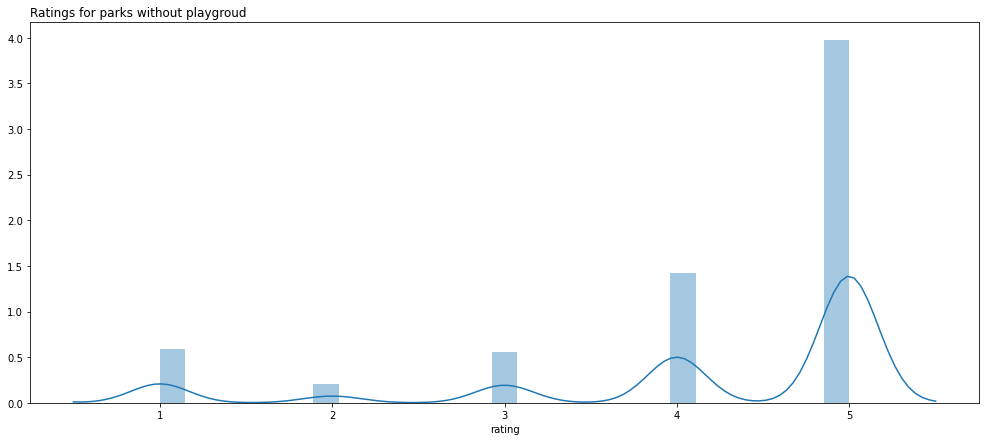

In [5]:
plt.rcParams['figure.figsize'] = (17, 7) 
plt.title('Ratings for parks without playgroud', loc='left')
sns.distplot(park_df['rating']);
f1 = plt.gcf()

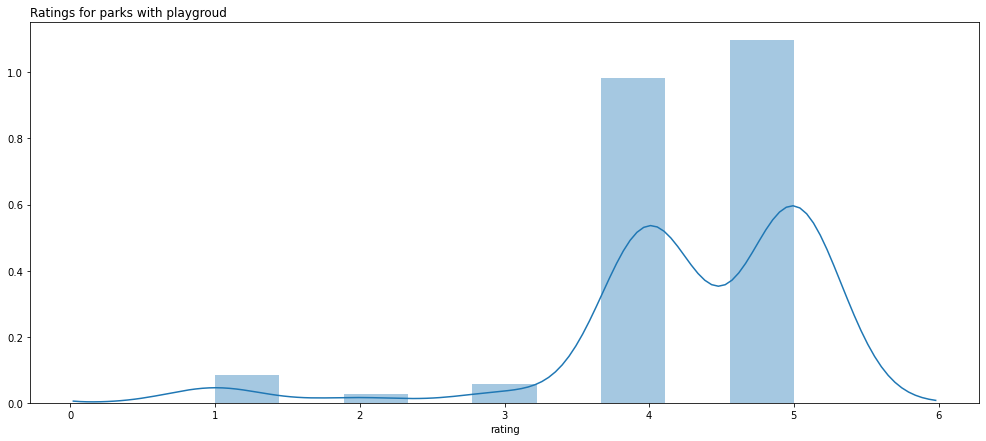

In [6]:
plt.rcParams['figure.figsize'] = (17, 7) 
plt.title('Ratings for parks with playgroud', loc='left')
sns.distplot(childPark_df['rating']);
f1 = plt.gcf()

From the histogram we can see the distributions are not very different. We can only see an increase in rating number 4 for parks with a playground.
Thus, I decided to a sentiment analysis to see if people give generally more positive ratings when the park has a playground. 

I first check the frequency for some words of interest for both dataframe:

In [7]:
def check_word_freq(df1, df2, word):
    withPlayground = df1['text'].str.lower().str.contains(word).sum()/df1['text'].notnull().sum()
    withoutPlayground = df2['text'].str.lower().str.contains(word).sum()/df2['text'].notnull().sum()
    out = pd.DataFrame({'with_playground': [withPlayground], 'without_playground': [withoutPlayground]})
    return out

Check for the word "enjoy"

In [8]:
check_word_freq(childPark_df, park_df, 'enjoy')

,with_playground,without_playground
0,0.0625,0.040391


Check for the word "fun"

In [9]:
check_word_freq(childPark_df, park_df, 'fun')

,with_playground,without_playground
0,0.0125,0.033733


Check for the word "love"

In [10]:
check_word_freq(childPark_df, park_df, 'love')

,with_playground,without_playground
0,0.1375,0.101642


Check for the word "boring"

In [11]:
check_word_freq(childPark_df, park_df, 'boring')

,with_playground,without_playground
0,0.0,0.000888


Then I perform the sentiment analysis:

First, I tokenize the reviews:

In [12]:
# import word tokenizer
from nltk.tokenize import word_tokenize

In [13]:
# tokennize park reviews without and with playground(s)
park_df['withoutPlayground_token'] = park_df['text'].apply(word_tokenize) 
childPark_df['withPlayground_token'] = childPark_df['text'].apply(word_tokenize) 

Then I clean up the stop words:

In [14]:
# import stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [15]:
# create new column removing all stop words
park_df['withoutPlayground_stop'] = park_df['withoutPlayground_token'].apply(lambda x: [item for item in x if item not in stop_words])
childPark_df['withPlayground_stop'] = childPark_df['withPlayground_token'].apply(lambda x: [item for item in x if item not in stop_words])

Then I perform stemming to make the text analyzable:

In [16]:
# get the stem for all tokens within the datasets
from nltk.stem import PorterStemmer

ps = PorterStemmer()

park_df['withoutPlayground_stem'] = park_df['withoutPlayground_stop'].apply(lambda x: [ps.stem(y) for y in x])
childPark_df['withPlayground_stem'] = childPark_df['withPlayground_stop'].apply(lambda x: [ps.stem(y) for y in x])

In [17]:
# get series of all most frequent words for both set of reviews after stemming
withPlayground = childPark_df['withPlayground_stem'].apply(pd.Series).stack()

In [18]:
# import FreqDist to calculate frequency and plot a graph accordingly
from nltk.probability import FreqDist
import string

# calculation word frequency
fdist_withPlayground = FreqDist(withPlayground)

# remove punctuation counts
for punc in string.punctuation:
    del fdist_withPlayground[punc]

Plot graph to visualize these words:

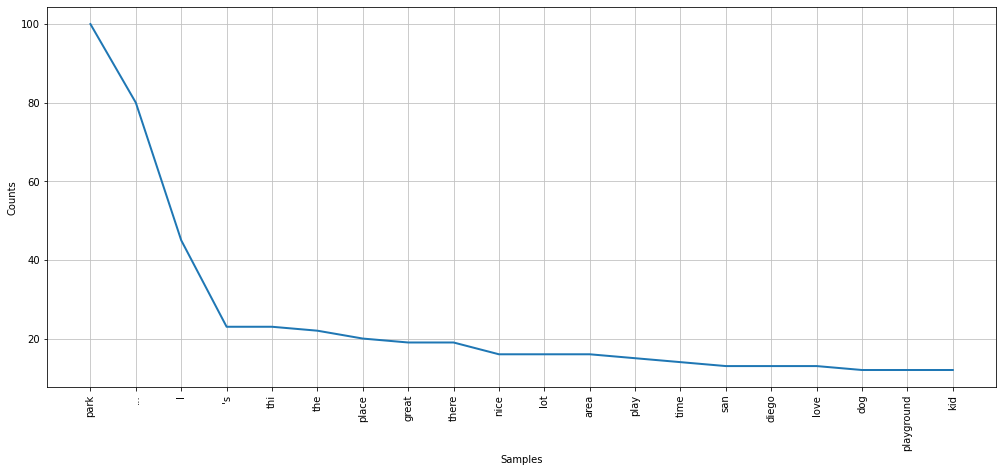

In [19]:
# plot frequency distribution to see the most frequent words
fdist_withPlayground.plot(20, cumulative=False)

Then we analyze the overall sentiment:

In [20]:
# compare text to the VADER lexicon to get a measure of overall sentiment in the reviews
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

In [21]:
# get list of the 'sentences' (responses) from each individual
without_list = list(park_df['text'].values)
with_list = list(childPark_df['text'].values)

In [22]:
# create function that will output dataframe that stores sentiment information
def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [23]:
# get sentiment measures
withoutP_sentiments = get_sentiments(without_list)
withP_sentiments = get_sentiments(with_list)

In [24]:
# to get a sense of the values stored in each of these dataframes, first of all parks without playground
withoutP_sentiments.describe()

,compound,neg,neu,pos
count,2253.000000,2253.000000,2253.000000,2253.000000
mean,0.446918,0.031052,0.798150,0.170792
std,0.451659,0.059614,0.126889,0.128252
min,-0.918400,0.000000,0.343000,0.000000
25%,0.076600,0.000000,0.714000,0.081000
50%,0.599400,0.000000,0.804000,0.157000
75%,0.812600,0.054000,0.892000,0.255000
max,0.976300,0.506000,1.000000,0.622000


In [25]:
# sentiment measures for parks with playground
withP_sentiments.describe()

,compound,neg,neu,pos
count,80.000000,80.000000,80.000000,80.000000
mean,0.549139,0.023525,0.779262,0.197200
std,0.444076,0.050936,0.114785,0.126205
min,-0.822500,0.000000,0.518000,0.000000
25%,0.439400,0.000000,0.695000,0.107750
50%,0.710700,0.000000,0.796500,0.183000
75%,0.858875,0.000000,0.865000,0.301750
max,0.955600,0.272000,1.000000,0.443000


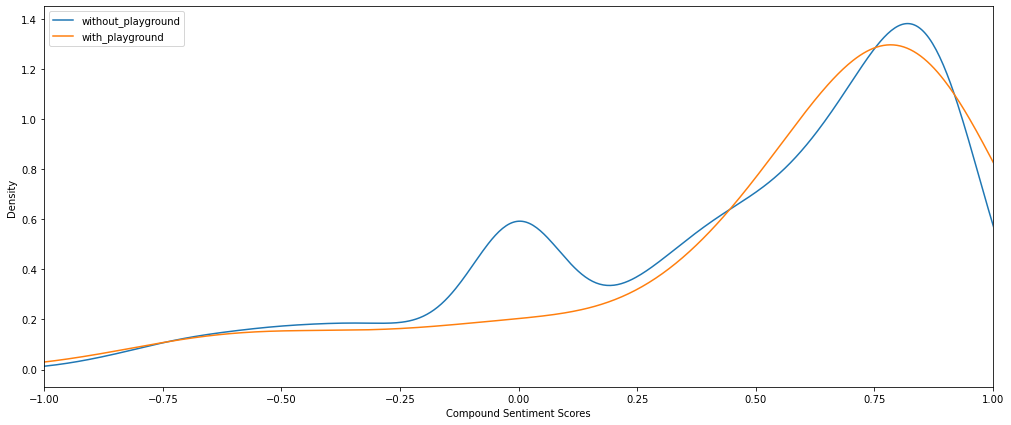

In [26]:
#compare the distribution of the compound metric between the two analyses
withoutP_sentiments['compound'].plot.density(label='without_playground')
withP_sentiments['compound'].plot.density(label='with_playground')
plt.legend()
plt.xlabel('Compound Sentiment Scores')
plt.xlim(-1,1);

In [27]:
# include label for boxplot
withoutP_sentiments['which'] = 'without_playground'
withP_sentiments['which'] = 'with_playground'
# concatenate data frames together
compound_out = pd.concat([withoutP_sentiments, withP_sentiments])
compound_out.head()

,compound,neg,neu,pos,sentence,which
0,0.8916,0.0,0.674,0.326,Was invited to child's B-Day party pre Covid-1...,without_playground
1,0.9610,0.0,0.507,0.493,"Pretty nice park, beautiful design. Anyone is...",without_playground
2,0.8555,0.0,0.749,0.251,We love Civita Park for its wide open spaces t...,without_playground
3,0.9336,0.0,0.647,0.353,I LOVE this spot!!! So beautiful at night!! Th...,without_playground
4,0.7264,0.0,0.816,0.184,I took my kids here on a week day before The 4...,without_playground


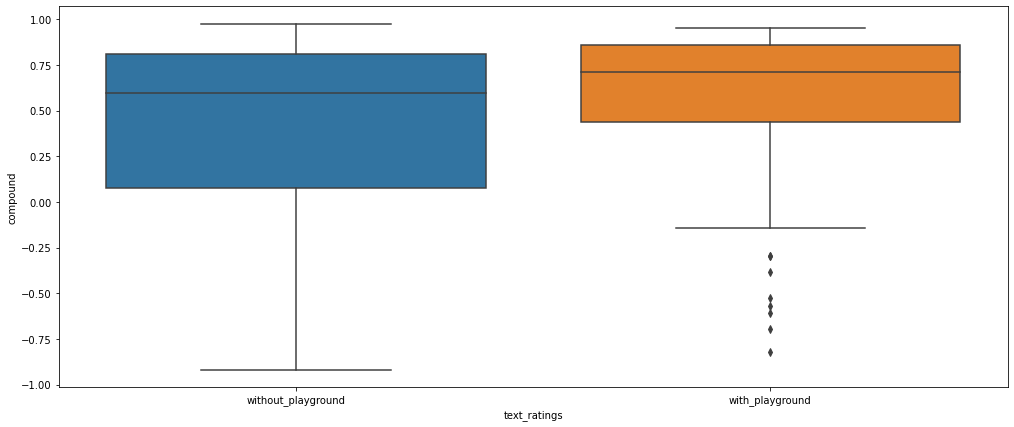

In [28]:
# plot compound by resonse type
sns.boxplot(data=compound_out, x='which', y='compound')
plt.xlabel('text_ratings');

# Ethics & Privacy

The first critical issue regarding ethics and privacy is removing any personal information that is identifiable to protect others' privacy. Since we are using reviews from Yelp, it is important that we remove information such as username, user ID, etc. This step is done before I imported the data. Other information about the park can be used directly. 

Another issue to consider is that I only used ratings from Yelp, thus, it might not be adequate to generalize the result to every single people within San Diego. This is because Yelp users might only include people from certain age groups and internet habits. Also, there might be users of other different websites and applications that we did not take into consideration. These factors mean that the data collection process is biased (no random selection), thus we should acknowledge the potential influence on the result of such bias. Furthermore, it is not appropriate to generalize the results to all park visitors within the United States, because we only used data of park visitors within San Diego. 


# Conclusion & Discussion

Based on the analysis, we can conclude that the sentiment of the reviews for parks with a playground is slightly more positive, and the original hypothesis was correct. 

However, there are limitations to my analysis. First of all, we don't know the timespan the reviews we collected. There might be park renovations in between that might alter our classification. Also, we only considered review from one application. It might be better if we considered from multiple platforms. Additionally, the difference between the compound sentiment score is quite small. It might not be appropriate to generate such a conclusion if our data set for parks with a playground was larger. 

Finally, we cannot establish any causal relationship between the existence of parks and people's happiness when visiting. There are confounding variables such as other amenities within the park, the size of the park, and the time when people are visiting.